In [4]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEΩ

# load & inspect

In [5]:
# loading dataset
df = pd.read_csv("/kaggle/input/pr-21-competition-classification/train.csv")

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,0


In [7]:
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,0
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,2
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,0
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,3
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,0
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,0


In [8]:
# change column names
new_column_names = [
    'Product ID',
    'Product Weight',
    'Fat Content',
    'Product Visibility',
    'Product Type',
    'Maximum Retail Price',
    'Outlet ID',
    'Outlet Establishment Year',
    'Outlet Size',
    'Outlet Tier',
    'Market Type'
]
df.columns = new_column_names

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product ID                 8523 non-null   object 
 1   Product Weight             7060 non-null   float64
 2   Fat Content                8523 non-null   object 
 3   Product Visibility         8523 non-null   float64
 4   Product Type               8523 non-null   object 
 5   Maximum Retail Price       8523 non-null   float64
 6   Outlet ID                  8523 non-null   object 
 7   Outlet Establishment Year  8523 non-null   int64  
 8   Outlet Size                6113 non-null   object 
 9   Outlet Tier                8523 non-null   object 
 10  Market Type                8523 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 732.6+ KB


In [10]:
df.columns


Index(['Product ID', 'Product Weight', 'Fat Content', 'Product Visibility',
       'Product Type', 'Maximum Retail Price', 'Outlet ID',
       'Outlet Establishment Year', 'Outlet Size', 'Outlet Tier',
       'Market Type'],
      dtype='object')

In [11]:
df.isna().sum()

Product ID                      0
Product Weight               1463
Fat Content                     0
Product Visibility              0
Product Type                    0
Maximum Retail Price            0
Outlet ID                       0
Outlet Establishment Year       0
Outlet Size                  2410
Outlet Tier                     0
Market Type                     0
dtype: int64

In [12]:
df.dtypes.value_counts()

object     6
float64    3
int64      2
Name: count, dtype: int64

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Product Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Product Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Maximum Retail Price,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet Establishment Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Market Type,8523.0,0.673941,1.046831,0.000,0.000000,0.000000,1.000000,3.000000


# EDA

In [14]:
df['Market Type'].describe()

count    8523.000000
mean        0.673941
std         1.046831
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Market Type, dtype: float64

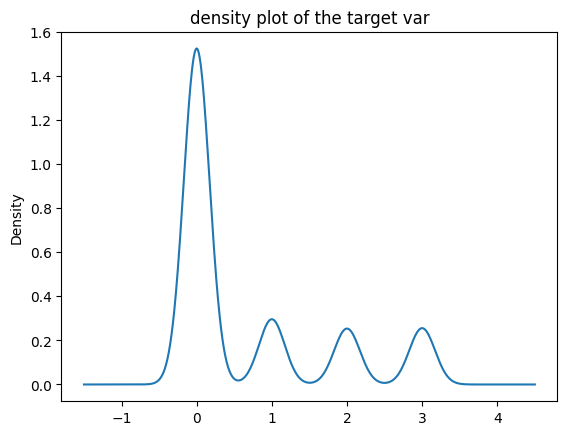

In [15]:
df['Market Type'].plot(kind='kde')
plt.title(f"density plot of the target var")
plt.show()

this shows that the data set is imbalanced with class 0 dominating the others


## examine categorical columns

In [16]:
cat_columns = df.select_dtypes(include="object")
cat_columns

,Product ID,Fat Content,Product Type,Outlet ID,Outlet Size,Outlet Tier
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3
4,NCD19,Low Fat,Household,OUT013,High,Tier 3
...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3


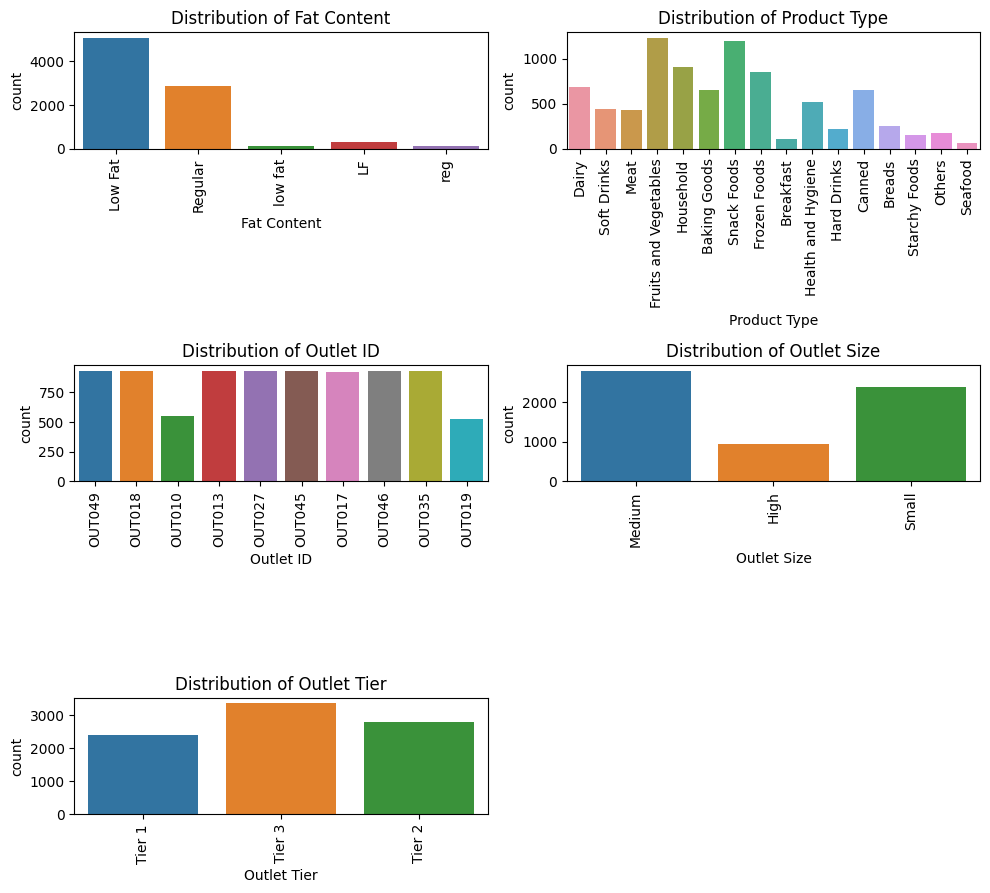

In [17]:
plt.figure(figsize=(10, 15))

for i, col in enumerate(cat_columns.columns[1:], 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

this shows:
inconsistent labeling in fat content variable
The Outlet Size variable is  imbalanced, with 'Medium' and 'Small' sizes being more common than 'High'.
The Outlet Tier feature is fairly balanced, with each tier (1, 2, and 3) having a comparable number of data points.

In [18]:
numerical_df = df.select_dtypes(include="number")
numerical_df

,Product Weight,Product Visibility,Maximum Retail Price,Outlet Establishment Year,Market Type
0,9.300,0.016047,249.8092,1999,0
1,5.920,0.019278,48.2692,2009,2
2,17.500,0.016760,141.6180,1999,0
3,19.200,0.000000,182.0950,1998,1
4,8.930,0.000000,53.8614,1987,0
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0
8519,8.380,0.046982,108.1570,2002,0
8520,10.600,0.035186,85.1224,2004,0
8521,7.210,0.145221,103.1332,2009,2


In [19]:
corr = numerical_df.corr()
corr.style.background_gradient()

,Product Weight,Product Visibility,Maximum Retail Price,Outlet Establishment Year,Market Type
Product Weight,1.000000,-0.014048,0.027141,-0.011588,0.002618
Product Visibility,-0.014048,1.000000,-0.001315,-0.074834,0.024681
Maximum Retail Price,0.027141,-0.001315,1.000000,0.005020,-0.005083
Outlet Establishment Year,-0.011588,-0.074834,0.005020,1.000000,-0.293863
Market Type,0.002618,0.024681,-0.005083,-0.293863,1.000000


Most features show very weak correlation (values near zero) with the target.

In [20]:
positively_correlated_features = corr['Market Type'][ (corr['Market Type'] > 0) & (corr.index != 'Market Type') ]
positively_correlated_features

Product Weight        0.002618
Product Visibility    0.024681
Name: Market Type, dtype: float64

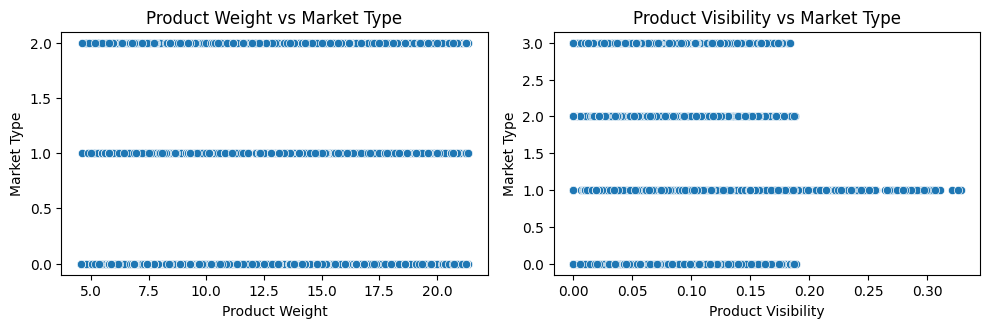

In [21]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(positively_correlated_features.index):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=col, y='Market Type', data=df)
    plt.title(f"{col} vs Market Type")

plt.tight_layout()
plt.show()

In [22]:
# market Type 3 is more common when product visibility is near zero.

In [23]:
negatively_correlated_features = corr['Market Type'][ (corr['Market Type'] < 0) & (corr.index != 'Market Type') ]
negatively_correlated_features

Maximum Retail Price        -0.005083
Outlet Establishment Year   -0.293863
Name: Market Type, dtype: float64

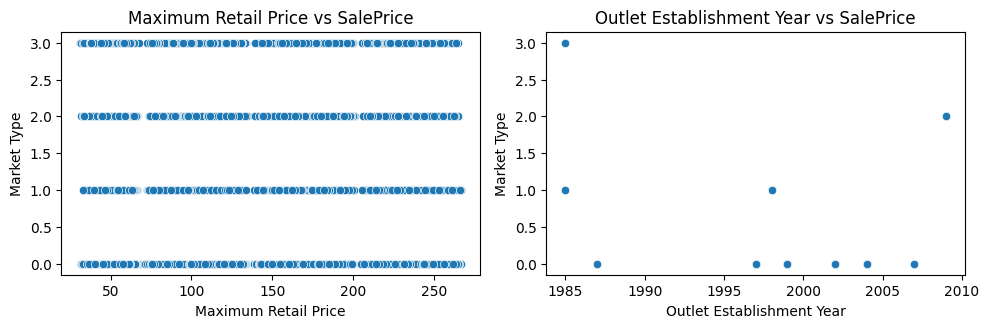

In [24]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(negatively_correlated_features.index):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=col, y='Market Type', data=df)
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()

Maximum Retail Price is not useful for predicting Market Type due to minimal correlation.
Outlet Establishment Year shows a more meaningful trend, where older outlets tend to fall into lower market type categories (e.g., Type 1 or 0) and
newer outlets are more likely to fall into higher market types.

# standardize fat content column

In [25]:
df['Fat Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
# convert all to lowercase first for consistent processing
df['Fat Content'] = df['Fat Content'].str.lower()

# create mapping dictionary
fat_mapping = {
    'low fat': 'Low Fat',
    'lf': 'Low Fat',
    'regular': 'Regular',
    'reg': 'Regular'
}

# apply the mapping
df['Fat Content'] = df['Fat Content'].map(fat_mapping)

In [27]:
df['Fat Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

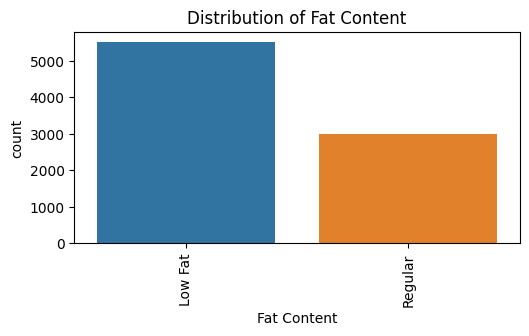

In [28]:
plt.figure(figsize=(10,15))

for i, col in enumerate(cat_columns.columns[1:2], 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# handle missing values

In [29]:
df.isnull().sum()

Product ID                      0
Product Weight               1463
Fat Content                     0
Product Visibility              0
Product Type                    0
Maximum Retail Price            0
Outlet ID                       0
Outlet Establishment Year       0
Outlet Size                  2410
Outlet Tier                     0
Market Type                     0
dtype: int64

In [30]:
# impute 'Product Weight' with median (robust to outliers)
df['Product Weight'] = df.groupby('Product Type')['Product Weight'].transform(
    lambda x: x.fillna(x.median()))

In [31]:
df['Product Weight'].isnull().sum()

0

mode imputation within groups:
Group by Outlet ID.
Take the mode of Outlet Size for each group.
Use that mode to fill missing values within the same group.

In [32]:
# map each Outlet ID to its Outlet Size after removing nul values
outlet_size_map = df.dropna(subset=['Outlet Size']).groupby('Outlet ID')['Outlet Size'].agg(lambda x: x.mode().iloc[0])

# if Outlet Size is null, replace null value with size from mapping
df['Outlet Size'] = df.apply(
    lambda row: outlet_size_map[row['Outlet ID']] if pd.isnull(row['Outlet Size']) and row['Outlet ID'] in outlet_size_map else row['Outlet Size'],
    axis=1
)

In [33]:
df['Outlet Size'].isnull().sum()

2410

In [34]:
# replace null values with mode Outlet Size
df['Outlet Size'] = df['Outlet Size'].fillna(df['Outlet Size'].mode().iloc[0])

In [35]:
df['Outlet Size'].isnull().sum()

0

# handle outliers

In [36]:
for col in numerical_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Product Weight: 0
Count of outliers in Product Visibility: 144
Count of outliers in Maximum Retail Price: 0
Count of outliers in Outlet Establishment Year: 0
Count of outliers in Market Type: 935


In [37]:
# perform Winsorization on Product Visibility column
col = df.columns[3]

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the values
df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [38]:
for col in numerical_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Product Weight: 0
Count of outliers in Product Visibility: 0
Count of outliers in Maximum Retail Price: 0
Count of outliers in Outlet Establishment Year: 0
Count of outliers in Market Type: 935


# handle market type class imbalance

Market Type
0    5577
1    1083
3     935
2     928
Name: count, dtype: int64
Market Type
0    0.654347
1    0.127068
3    0.109703
2    0.108882
Name: proportion, dtype: float64


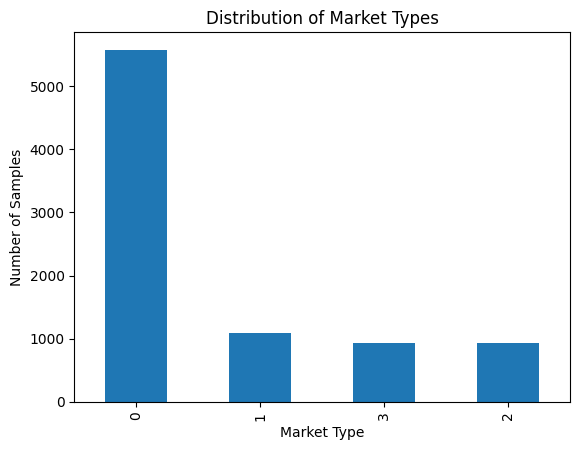

In [39]:
print(df['Market Type'].value_counts())
print(df['Market Type'].value_counts(normalize=True))

df['Market Type'].value_counts().plot(kind='bar')
plt.xlabel('Market Type')
plt.ylabel('Number of Samples')
plt.title('Distribution of Market Types')
plt.show()


In [40]:
# from sklearn.ensemble import RandomForestClassifier

# # inverse frequency weighting (penalizes model more for minority class errors)
# class_weights = {
#     0: 1,      # Majority class (weight=1)
#     1: 6.5,    # 0.654/0.127 ≈ 5.15 (rounded up for stronger adjustment)
#     2: 6.0,    # 0.654/0.109 ≈ 6.0
#     3: 6.0     # 0.654/0.109 ≈ 6.0
# }

# model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# same processes for test values

In [41]:
df_test = pd.read_csv("/kaggle/input/pr-21-competition-classification/test.csv")

In [42]:
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3


In [43]:
# change column names
new_column_names_test = [
    'Product ID',
    'Product Weight',
    'Fat Content',
    'Product Visibility',
    'Product Type',
    'Maximum Retail Price',
    'Outlet ID',
    'Outlet Establishment Year',
    'Outlet Size',
    'Outlet Tier'
]
df_test.columns = new_column_names_test

In [44]:
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Product ID,Product Weight,Fat Content,Product Visibility,Product Type,Maximum Retail Price,Outlet ID,Outlet Establishment Year,Outlet Size,Outlet Tier
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product ID                 5681 non-null   object 
 1   Product Weight             4705 non-null   float64
 2   Fat Content                5681 non-null   object 
 3   Product Visibility         5681 non-null   float64
 4   Product Type               5681 non-null   object 
 5   Maximum Retail Price       5681 non-null   float64
 6   Outlet ID                  5681 non-null   object 
 7   Outlet Establishment Year  5681 non-null   int64  
 8   Outlet Size                4075 non-null   object 
 9   Outlet Tier                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [46]:
df_test['Fat Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [47]:
# convert all to lowercase first for consistent processing
df_test['Fat Content'] = df_test['Fat Content'].str.lower()

# create mapping dictionary
fat_mapping_test = {
    'low fat': 'Low Fat',
    'lf': 'Low Fat',
    'regular': 'Regular',
    'reg': 'Regular'
}

# apply the mapping
df_test['Fat Content'] = df_test['Fat Content'].map(fat_mapping_test)

In [48]:
df_test['Fat Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [49]:
df_test.isnull().sum()

Product ID                      0
Product Weight                976
Fat Content                     0
Product Visibility              0
Product Type                    0
Maximum Retail Price            0
Outlet ID                       0
Outlet Establishment Year       0
Outlet Size                  1606
Outlet Tier                     0
dtype: int64

In [50]:
# impute 'Product Weight' with median (robust to outliers)
df_test['Product Weight'] = df_test.groupby('Product Type')['Product Weight'].transform(
    lambda x: x.fillna(x.median()))

In [51]:
df_test['Product Weight'].isnull().sum()

0

In [52]:
# map each Outlet ID to its Outlet Size after removing nul values
outlet_size_map_test = df_test.dropna(subset=['Outlet Size']).groupby('Outlet ID')['Outlet Size'].agg(lambda x: x.mode().iloc[0])

# if Outlet Size is null, replace null value with size from mapping
df_test['Outlet Size'] = df_test.apply(
    lambda row: outlet_size_map_test[row['Outlet ID']] if pd.isnull(row['Outlet Size']) and row['Outlet ID'] in outlet_size_map_test else row['Outlet Size'],
    axis=1
)

In [53]:
df_test['Outlet Size'].isnull().sum()

1606

In [54]:
# replace null values with mode Outlet Size
df_test['Outlet Size'] = df_test['Outlet Size'].fillna(df_test['Outlet Size'].mode().iloc[0])

In [55]:
df_test['Outlet Size'].isnull().sum()

0

In [56]:
numerical_df_test = df_test.select_dtypes(include="number")
numerical_df_test

,Product Weight,Product Visibility,Maximum Retail Price,Outlet Establishment Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.800,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


In [57]:
for col in numerical_df_test:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Product Weight: 0
Count of outliers in Product Visibility: 111
Count of outliers in Maximum Retail Price: 0
Count of outliers in Outlet Establishment Year: 0


In [58]:
# perform Winsorization on Product Visibility column
col = df_test.columns[3]

Q1 = df_test[col].quantile(0.25)
Q3 = df_test[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the values
df_test[col] = np.where(df_test[col] < lower_bound, lower_bound, df_test[col])
df_test[col] = np.where(df_test[col] > upper_bound, upper_bound, df_test[col])


In [59]:
for col in numerical_df_test:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)]
    print(f"Count of outliers in {col}: {outliers.shape[0]}")

Count of outliers in Product Weight: 0
Count of outliers in Product Visibility: 0
Count of outliers in Maximum Retail Price: 0
Count of outliers in Outlet Establishment Year: 0


# Feature Engineering


In [60]:
df['Outlet_Age'] = 2025 - df['Outlet Establishment Year']
df['Price_per_gram'] = df['Maximum Retail Price'] / df['Product Weight']
df['Log_Visibility'] = np.log1p(df['Product Visibility'])
df['Is_Invisible'] = (df['Product Visibility'] == 0).astype(int)

In [61]:
df_test['Outlet_Age'] = 2025 - df['Outlet Establishment Year']
df_test['Price_per_gram'] = df['Maximum Retail Price'] / df['Product Weight']
df_test['Log_Visibility'] = np.log1p(df['Product Visibility'])
df_test['Is_Invisible'] = (df['Product Visibility'] == 0).astype(int)

In [62]:
# aggregate features
df['Avg_Visibility_by_Outlet'] = df.groupby('Outlet ID')['Product Visibility'].transform('mean')
df['Product_Count_by_Outlet'] = df.groupby('Outlet ID')['Product ID'].transform('count')
df['Avg_Weight_by_Type'] = df.groupby('Product Type')['Product Weight'].transform('mean')



In [63]:
# aggregate features
df_test['Avg_Visibility_by_Outlet'] = df.groupby('Outlet ID')['Product Visibility'].transform('mean')
df_test['Product_Count_by_Outlet'] = df.groupby('Outlet ID')['Product ID'].transform('count')
df_test['Avg_Weight_by_Type'] = df.groupby('Product Type')['Product Weight'].transform('mean')



ordinal encoding


In [64]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_features = ['Outlet Size', 'Outlet Tier']
ordinal_categories = [['Small', 'Medium', 'High'], ['Tier 3', 'Tier 2', 'Tier 1']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])
df_test[ordinal_features] = ordinal_encoder.transform(df_test[ordinal_features])
print(df[ordinal_features].head())

   Outlet Size  Outlet Tier
0          1.0          2.0
1          1.0          0.0
2          1.0          2.0
3          1.0          0.0
4          2.0          0.0


In [65]:

df['Fat Content'] = df['Fat Content'].map({'Low Fat': 0, 'Regular': 1})
df_test['Fat Content'] = df_test['Fat Content'].map({'Low Fat': 0, 'Regular': 1})
print(df['Fat Content'].head())

0    0
1    1
2    0
3    1
4    0
Name: Fat Content, dtype: int64


In [66]:
df.columns


Index(['Product ID', 'Product Weight', 'Fat Content', 'Product Visibility',
       'Product Type', 'Maximum Retail Price', 'Outlet ID',
       'Outlet Establishment Year', 'Outlet Size', 'Outlet Tier',
       'Market Type', 'Outlet_Age', 'Price_per_gram', 'Log_Visibility',
       'Is_Invisible', 'Avg_Visibility_by_Outlet', 'Product_Count_by_Outlet',
       'Avg_Weight_by_Type'],
      dtype='object')

In [67]:
# pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 --force-reinstall --no-cache-dir

In [68]:

drop_cols = [
    'Product ID',
    'Avg_Visibility_by_Outlet',
    'Product_Count_by_Outlet',
    'Outlet_Age'
]

X_train = df.drop(columns=drop_cols + ['Market Type'])
y_train = df['Market Type']

X_test = df_test.drop(columns=drop_cols)  # drop same features
 # No 'Market Type' in test

one_hot encoding and alignment between train and test

In [69]:

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
train_columns = X_train_encoded.columns
X_test_encoded = X_test_encoded.reindex(columns=train_columns, fill_value=0)

print(f"Training features shape: {X_train_encoded.shape}")
print(f"Test features shape: {X_test_encoded.shape}")
print(f"Column alignment check: {X_train_encoded.columns.equals(X_test_encoded.columns)}")

Training features shape: (8523, 37)
Test features shape: (5681, 37)
Column alignment check: True


PCA and Scaling

In [70]:

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)  

# Fit PCA on training data only
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) 

print(f"Original number of features: {X_train_encoded.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")
print(f"Training data shape: {X_train_pca.shape}")
print(f"Test data shape: {X_test_pca.shape}")


Original number of features: 37
Reduced number of features after PCA: 27
Training data shape: (8523, 27)
Test data shape: (5681, 27)


# Training Model

label encoding y_train

In [71]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [76]:
# pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 --force-reinstall --no-cache-dir

In [75]:
from imblearn.over_sampling import SMOTE

# X_tr, y_tr: Training set (80% of data)
# X_val, y_val: Validation set (20% of data)
X_tr, X_val, y_tr, y_val = train_test_split(
   X_train_pca, y_train_encoded, 
   test_size=0.2, 
   random_state=42, 
stratify=y_train_encoded
)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_tr, y_tr= smote.fit_resample(X_tr, y_tr)

# Check new class distribution
import numpy as np
unique, counts = np.unique(y_tr, return_counts=True)
print("After SMOTE class distribution:", dict(zip(unique, counts)))


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

After SMOTE class distribution: {0: 4461, 1: 4461, 2: 4461, 3: 4461}


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

Grid Search for Hyperparameter Tuning

In [ ]:
# X_tr, y_tr: Training set (80% of data)
# X_val, y_val: Validation set (20% of data)
X_tr, X_val, y_tr, y_val = train_test_split(
   X_train_pca, y_train_encoded, 
   test_size=0.2, 
   random_state=42, 
stratify=y_train_encoded
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2]
}

xgb_model = xgb.XGBClassifier(
   objective='multi:softprob',
   random_state=42,
   eval_metric='mlogloss'
)

# Grid search with cross-validation
grid_search = GridSearchCV(
   xgb_model,
   param_grid,
   cv=3,  
    scoring='accuracy',
    n_jobs=1,  
    verbose=1
)

grid_search.fit(X_tr, y_tr)

In [ ]:

best_xgb = xgb.XGBClassifier(
   **grid_search.best_params_,
   objective='multi:softprob',
   random_state=42,
   eval_metric='mlogloss'
)

best_xgb.fit(
   X_tr, y_tr,
   eval_set=[(X_val, y_val)],
   early_stopping_rounds=10,
   verbose=False
)

val_pred = best_xgb.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation accuracy with best model: {val_accuracy:.4f}")


In [ ]:
final_model = xgb.XGBClassifier(
   **grid_search.best_params_,
   objective='multi:softprob',
   random_state=42,
   eval_metric='mlogloss'
)
final_model.fit(X_train_pca, y_train_encoded)


test set predictions

In [ ]:


test_pred_encoded = final_model.predict(X_test_pca)
test_pred_proba = final_model.predict_proba(X_test_pca)
test_pred = label_encoder.inverse_transform(test_pred_encoded)

print(f"Test predictions shape: {test_pred.shape}")
print(f"Prediction probabilities shape: {test_pred_proba.shape}")
print(f"Sample predictions: {test_pred[:10]}")



Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== VALIDATION PERFORMANCE METRICS ===")

# Confusion matrix
cm = confusion_matrix(y_val, val_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
target_names = [str(cls) for cls in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_val, val_pred, target_names=target_names))

# Accuracy
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
import pandas as pd

submission = pd.DataFrame({
    'row_id': range(len(test_pred)),  # 0, 1, 2, ... up to len(test_pred)-1
    'label': test_pred                # your model’s predicted labels
})

print(f"Submission shape: {submission.shape}")
print("First few rows:")
print(submission.head())

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

# ===== VALIDATION CHECKS =====
print("\n=== SUBMISSION VALIDATION ===")
print(f"Total predictions: {len(submission)}")
print(f"Missing values: {submission.isnull().sum().sum()}")
print(f"Unique labels: {submission['label'].nunique()}")
print("Label distribution:")
print(submission['label'].value_counts())





In [ ]:
from sklearn.feature_selection import mutual_info_classif

# X_encoded: your one-hot encoded features
# y: target

mi_scores = mutual_info_classif(X_train_encoded, df['Market Type'])


# Combine feature names and MI scores, sort descending:
mi_df = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print(mi_df.head(20))